In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

2023-10-29 09:38:16.582989: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-29 09:38:23.470229: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-29 09:38:33.324756: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#Loading dataset
(X_train , y_train) , (X_test , y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [3]:
#Class-names
class_names = ['top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#Preprocessing
X_train = X_train / 255
X_test = X_test / 255

#black and white image
X_train = X_train.reshape(60000 , 28 , 28 , 1) #a single color channel
X_test = X_test.reshape(10000 , 28 , 28 , 1)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


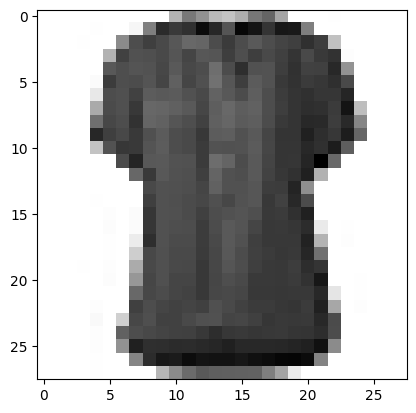

In [5]:
#Showing test
plt.imshow(X_train[55].reshape((28 , 28)) , cmap = plt.cm.binary)

In [6]:
#Construction of the CNN
model = tf.keras.models.Sequential()

In [7]:
#CNN
model.add(tf.keras.layers.Conv2D(filters = 32 , kernel_size = 3 , activation = 'relu' , input_shape = (28 , 28 , 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size = 3))

model.add(tf.keras.layers.Conv2D(filters = 16 , kernel_size = 3 , activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = 3))

model.add(tf.keras.layers.Flatten()) #Flatten the image

#ANN Classic
model.add(tf.keras.layers.Dense(256 , activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting
model.add(tf.keras.layers.Dense(10 , activation = 'softmax'))

In [8]:
#Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 16)          4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 256)               1

In [9]:
#Compilation
model.compile(loss = "sparse_categorical_crossentropy" , 
              optimizer = "Adam" , metrics = ["sparse_categorical_accuracy"])

In [10]:
#Training
model.fit(X_train , y_train , epochs = 10)

2023-10-29 09:41:18.090953: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
   5/1875 [..............................] - ETA: 53s - loss: 2.2902 - sparse_categorical_accuracy: 0.1750   

2023-10-29 09:41:46.065470: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20984832 exceeds 10% of free system memory.
2023-10-29 09:41:46.071591: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20984832 exceeds 10% of free system memory.
2023-10-29 09:41:46.176188: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20984832 exceeds 10% of free system memory.
2023-10-29 09:41:46.176338: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20984832 exceeds 10% of free system memory.


1875/1875 [==============================] - 35s 14ms/step - loss: 0.6646 - sparse_categorical_accuracy: 0.7560
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4431 - sparse_categorical_accuracy: 0.8376
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3932 - sparse_categorical_accuracy: 0.8568
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3616 - sparse_categorical_accuracy: 0.8674
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3416 - sparse_categorical_accuracy: 0.8758
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3266 - sparse_categorical_accuracy: 0.8812
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3146 - sparse_categorical_accuracy: 0.8837
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3035 - sparse_categorical_accuracy: 0.8893
Epoch 9/10
1875/1875 [=====

In [11]:
#Evaluate model on the test set
score = model.evaluate(X_test , y_test , verbose = 0)
#Print test accuracy
print('\n' , 'Test accuracy : ' , score[1])


 Test accuracy :  0.8881999850273132


In [12]:
#Prediction
prediction = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [16]:
#Visualisation function
def plot(i , predictions_array , true_label , img):
    predictions_array , true_label , img = predictions_array , true_label[i] , img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img , cmap = plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label] , 
                                         100 * np.max(predictions_array) , 
                                         class_names[true_label]) , 
                                         color = color)
    
def plot_value(i , predictions_array , true_label):
    predictions_array , true_label , img = predictions_array , true_label[i] , img[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([]) 
    thisplot = plt.bar(range(10) , predictions_array , color = "#777777")
    plt.ylim([0 , 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [17]:
(images_train , label_train) , (images_test , label_test) = fashion_mnist.load_data()

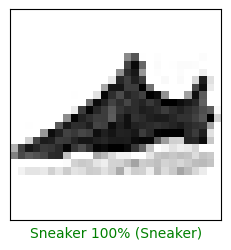

In [23]:
i = 1024
plt.figure(figsize = (6 , 4))
plt.subplot(1 , 2 , 1)
plot(i , prediction[i] , label_test , images_test)

plt.show()